## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Pre-Processing Steps

In [3]:
# Creating The Dataframe
bank_train = pd.read_csv('bank-additional-full.csv', header=0, delimiter=";")
bank_test = pd.read_csv('bank-additional.csv', delimiter=";")

In [4]:
print(bank_train.shape)
bank_train.head(20)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print(bank_test.shape)
bank_test.head(10)

(4119, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [6]:
print(bank_train.dtypes)
bank_train.describe

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [7]:
# Checking Missing Values
bank_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# Dropping y Col from testing file, for looking the Testing data Realistic.
bank_test.drop("y",axis=1,inplace=True)
bank_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


# Data Visualization

# Visualizing using Histplot

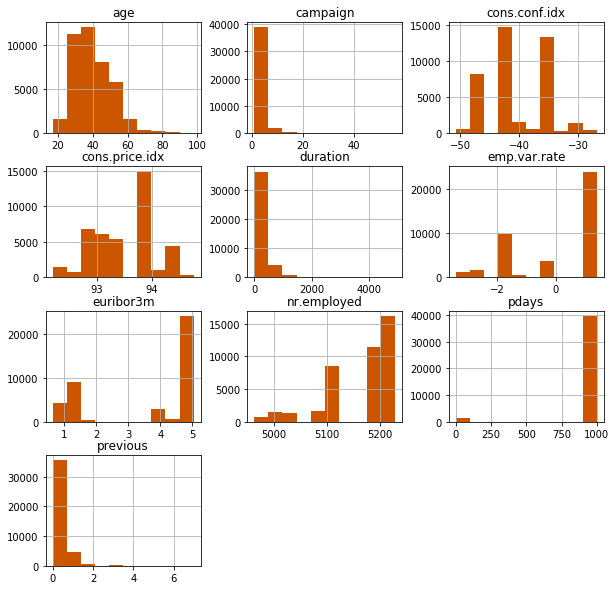

In [9]:
bank_train.hist(figsize=(10,10),color='#cc5500')
plt.show()

In [10]:
# Convert Categorical into Numerical
colname = bank_train.columns
colname

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
# Convert Categorical data into Numerical for Training Data
from sklearn.preprocessing import LabelEncoder 
 
le=LabelEncoder()
 
for x in colname:
    bank_train[x]=le.fit_transform(bank_train[x])

In [12]:
bank_train.head()

#0 --> yes
#1 --> No

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [13]:
# Convert Categorical into Numerical for Testing data
colname = bank_test.columns
colname

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [14]:
# Convert Categorical data into Numerical
from sklearn.preprocessing import LabelEncoder 
 
le=LabelEncoder()
 
for x in colname:
    bank_test[x]=le.fit_transform(bank_test[x])

In [15]:
bank_test.head()

#0 --> yes
#1 --> No

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,3,8,4,156,6
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,8,18,16,207,8
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,9,23,8,225,10
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,9,23,8,222,10
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,7,11,7,201,9


In [16]:
# Creating X & Y for Training Data
X = bank_train.values[:,0:-1]  # All Independent variable
Y = bank_train.values[:,-1] # dependent variable --> Classes
Y=Y.astype(int)

In [17]:
print(X.shape)
print(Y.shape)

(41188, 20)
(41188,)


In [18]:
# Scale the data -> To bring the data in uniform range
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X)
X = scaler.transform(X)

In [19]:
print(X)

[[ 1.5334083  -0.20157925 -0.2837415  ...  0.94739573  0.45678474
   0.0628044 ]
 [ 1.62938803  0.91122681 -0.2837415  ...  0.94739573  0.45678474
   0.0628044 ]
 [-0.29020655  0.91122681 -0.2837415  ...  0.94739573  0.45678474
   0.0628044 ]
 ...
 [ 1.5334083   0.35482378 -0.2837415  ... -1.72870087 -1.23257369
  -3.19614084]
 [ 0.38165155  1.46762984 -0.2837415  ... -1.72870087 -1.23257369
  -3.19614084]
 [ 3.26104342  0.35482378 -0.2837415  ... -1.72870087 -1.23257369
  -3.19614084]]


X --> Values are getting in Range of -3 to +3

In [20]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)

# Running Decison Tree Model

In [21]:
# predicting using Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=10,
                                   criterion="gini")

# fit the model on data and predict the values
model_DT.fit(X_train,Y_train)      # fit is the function that is used for training the data
Y_pred = model_DT.predict(X_test) # Validation Data
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0),

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10235   700]
 [  662   760]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10935
           1       0.52      0.53      0.53      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357

Accuracy of the model:  0.8897790725904345


In [23]:
model_DT.score(X_train,Y_train)

1.0

In [24]:
model_DT.feature_importances_

array([0.08996802, 0.04013096, 0.01996154, 0.03592162, 0.01037032,
       0.01776655, 0.01389931, 0.00749344, 0.01810792, 0.0353778 ,
       0.34610753, 0.03442256, 0.0129708 , 0.01049446, 0.02209153,
       0.00319365, 0.0111323 , 0.02291951, 0.08700861, 0.16066159])

In [25]:
print((list(zip(bank_train.columns[0:-1],
               model_DT.feature_importances_))))

[('age', 0.08996801936327219), ('job', 0.04013095892992523), ('marital', 0.01996154458691543), ('education', 0.03592161871024675), ('default', 0.010370322076893505), ('housing', 0.017766545272659286), ('loan', 0.013899309081467658), ('contact', 0.007493438913052227), ('month', 0.018107915966921358), ('day_of_week', 0.03537779981108333), ('duration', 0.3461075314090285), ('campaign', 0.034422555722240546), ('pdays', 0.012970799443182792), ('previous', 0.010494455744138188), ('poutcome', 0.022091529722016588), ('emp.var.rate', 0.003193651220532888), ('cons.price.idx', 0.011132302649636888), ('cons.conf.idx', 0.022919506441438867), ('euribor3m', 0.08700860610768632), ('nr.employed', 0.16066158882766166)]


In [26]:
# It is Feture Embedded Technique.
sample=pd.DataFrame()
 
sample["Column"]=bank_train.columns[0:-1]
sample["Imp value"]=model_DT.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
10,duration,0.346108
19,nr.employed,0.160662
0,age,0.089968
18,euribor3m,0.087009
1,job,0.040131
3,education,0.035922
9,day_of_week,0.035378
11,campaign,0.034423
17,cons.conf.idx,0.022920
14,poutcome,0.022092


# Generated HTML File Paste the code to code in webgraphviz.com to plot the decision tree

In [37]:
from sklearn import tree
with open(r"model_DT.txt", "w") as f:
    
    f = tree.export_graphviz(model_DT, feature_names=bank_train.columns[0:-1],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree

# Tuned Decision Tree Model

In [27]:
# predicting using Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=10,
                                   criterion="gini",
                                 splitter="best",
                                 min_samples_leaf=3,
                                 min_samples_split=5,
                                 max_depth=10
                                 )

# fit the model on data and predict the values
model_DT.fit(X_train,Y_train)      
Y_pred = model_DT.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0),

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10445   490]
 [  694   728]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10935
           1       0.60      0.51      0.55      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.73      0.75     12357
weighted avg       0.90      0.90      0.90     12357

Accuracy of the model:  0.9041838633972648


# Predicting on Test File (Real Data) bank_test

In [29]:
bank_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,3,8,4,156,6
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,8,18,16,207,8
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,9,23,8,225,10
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,9,23,8,222,10
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,7,11,7,201,9


In [30]:
test=bank_test.values
test=scaler.transform(test)

In [31]:
# predicting using Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=10)

# fit the model on data and predict the values
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [32]:
test_pred=model_DT.predict(test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
bank_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [34]:
# For Understanding the Client. Reloading the data.
bank_test=pd.read_csv(r"bank-additional.csv", header=0, delimiter=";")
bank_test.columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']  # Yact

bank_test["Pred"]=test_pred                     # Ypred
bank_test["Pred"]=bank_test["Pred"].replace({0:"No",1:"Yes"})   
bank_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Pred
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,No
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,No
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,No
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,No
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,No


**Conclusion:**

**We have Builded the Decision Tree and predicted whether the client will subscribe a term deposit. (yes/no)**
